In [263]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

# Cleaning the master dataset of stats and bio info

### Steps
- rename ambiguous columns e.g. "pct_1" -> "pct_pg"
- drop rows based on minutes threshold -> 650 min (keeps 2/3 data)
- look at missing data by year (plot)
- check some shooting % and location stuff
- fill missing shooting %s and locations with 0s
- drop `drawn_offensive`
- fill missing 2020 salary data with 'update_later'

In [265]:
df_master = pd.read_csv('bballref_data/master_nba_data.csv', index_col=0)
df_master.shape
df_master.head()

df = df_master.copy()

(11162, 92)

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,pf_per_poss,pts_per_poss,stl_per_poss,tov_per_poss,trb_per_poss,drawn_offensive,height,weight,salary,nationality
player,,,,,,,,,,,,,,,,,,,,,
Mahmoud Abdul-Rauf 1997,abdulma02,PG,27,SAC,75,2131,13.2,0.524,0.266,0.147,...,4.3,25.5,1.4,2.9,3.0,NaN,6-1,162,3100000.0,United States of America
Shareef Abdur-Rahim 1997,abdursh01,PF,20,VAN,80,2802,17.4,0.518,0.022,0.428,...,3.9,28.9,1.5,4.4,10.7,NaN,6-9,225,2186000.0,United States of America
Rafael Addison 1997,addisra01,SF,32,CHH,41,355,10.6,0.476,0.164,0.230,...,7.9,19.5,1.2,2.6,6.9,NaN,6-7,215,290000.0,United States of America
Cory Alexander 1997,alexaco01,PG,23,SAS,80,1454,14.3,0.528,0.514,0.263,...,5.6,21.8,3.1,5.5,4.7,NaN,6-1,185,521000.0,United States of America
Jerome Allen 1997,allenje01,SG,24,TOT,76,943,8.7,0.451,0.421,0.326,...,4.8,12.9,1.8,3.9,5.5,NaN,6-4,184,247500.0,United States of America


## Rename ambiguous column names

### ambiguous ones:

- `astd_pts` = PGA = points generated by assists = all the points scored for which player was credited with an assist  
- `fg3a_per_fga_pct` = percent of fga that were 3pa  
- `fg_pct_16_xx` = fg percent on shots from 16ft-3p  
- `pct_1` = percent of time spent at point guard, etc for other positions  
- `pct_fg3a_corner3` = percent of 3s that were from the corner  

In [244]:
sorted(list(df.columns))

['age',
 'and1s',
 'ast_pct',
 'ast_per_poss',
 'astd_pts',
 'avg_dist',
 'blk_pct',
 'blk_per_poss',
 'bpm',
 'dbpm',
 'def_rtg',
 'drawn_offensive',
 'drawn_shooting',
 'drb_pct',
 'drb_per_poss',
 'dws',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_heave',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_heave',
 'fg3a_per_fga_pct',
 'fg3a_per_poss',
 'fg_dunk',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fg_pct_fg2a',
 'fg_pct_fg3a',
 'fg_per_poss',
 'fga_per_poss',
 'fouls_offensive',
 'fouls_shooting',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'nationality',
 'obpm',
 'off_rtg',
 'orb_pct',
 'orb_per_poss',
 'own_shots_blk',
 'ows',
 'pct_1',
 'pct_2',
 'pct_3',
 'pct_4',
 'pct_5',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg2a',
 'pct_fga_fg3a',
 'per',
 'pf_per_poss'

### rename position cols

In [266]:
df = df_master.copy()
mapping = {'pct_1': 'pct_pg',
           'pct_2': 'pct_sg',
           'pct_3': 'pct_sf',
           'pct_4': 'pct_pf',
           'pct_5': 'pct_c'}
cols = list(mapping.keys())
vals = list(mapping.values())
df[cols].head()
df = df.rename(columns=mapping)
df[vals].head()

,pct_1,pct_2,pct_3,pct_4,pct_5
player,,,,,
Mahmoud Abdul-Rauf 1997,89%,11%,NaN,NaN,NaN
Shareef Abdur-Rahim 1997,NaN,NaN,35%,64%,NaN
Rafael Addison 1997,NaN,6%,90%,4%,NaN
Cory Alexander 1997,94%,6%,NaN,NaN,NaN
Jerome Allen 1997,72%,25%,2%,NaN,NaN


,pct_pg,pct_sg,pct_sf,pct_pf,pct_c
player,,,,,
Mahmoud Abdul-Rauf 1997,89%,11%,NaN,NaN,NaN
Shareef Abdur-Rahim 1997,NaN,NaN,35%,64%,NaN
Rafael Addison 1997,NaN,6%,90%,4%,NaN
Cory Alexander 1997,94%,6%,NaN,NaN,NaN
Jerome Allen 1997,72%,25%,2%,NaN,NaN


## Drop based on minutes threshold

(11162, 92)

<AxesSubplot:xlabel='mp', ylabel='Count'>

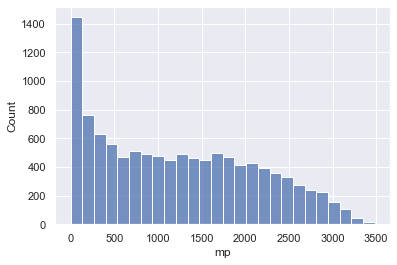

In [267]:
df.shape
sns.histplot(data=df['mp'])

In [268]:
print('See how much data remains for diff min cutoffs')
for n in range(0, 1000, 50):
    rem = df[df['mp'] > n].shape[0]
    print(f'{n}: {rem/len(df):.2f}')

# I like 650 for 2/3 arbitarily

See how much data remains for diff min cutoffs
0: 1.00
50: 0.93
100: 0.89
150: 0.86
200: 0.83
250: 0.81
300: 0.79
350: 0.77
400: 0.75
450: 0.73
500: 0.71
550: 0.69
600: 0.67
650: 0.66
700: 0.64
750: 0.63
800: 0.61
850: 0.59
900: 0.58
950: 0.56


### Quick check to see how many rows don't have 650 mp but played 25mpg for at least 20 games (i.e. ~starters who got hurt)

In [269]:
df[(df['mp'] < 650) & ((df['g'] > 20) & ((df['mp']/df['g']) > 25))]

## Not that many

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,pf_per_poss,pts_per_poss,stl_per_poss,tov_per_poss,trb_per_poss,drawn_offensive,height,weight,salary,nationality
player,,,,,,,,,,,,,,,,,,,,,
Brian Grant 1997,grantbr01,PF,24,SAC,24,607,14.5,0.511,0.000,0.435,...,6.5,21.9,1.7,3.8,12.3,NaN,6-9,254,1293000.0,United States of America
Zydrunas Ilgauskas 2001,ilgauzy01,C,25,CLE,24,616,16.0,0.524,0.009,0.333,...,6.7,24.0,1.3,5.1,13.7,NaN,7-3,238,10130000.0,Lithuania
Marc Jackson 2004,jacksma02,PF,29,PHI,22,598,13.2,0.498,0.006,0.474,...,4.1,18.8,1.1,2.2,11.5,NaN,6-10,270,3900000.0,United States of America
Grant Hill 2006,hillgr01,SF,33,ORL,21,613,19.0,0.552,0.033,0.420,...,4.4,28.2,2.1,3.1,7.1,16.0,6-8,225,15694250.0,United States of America
Larry Sanders 2014,sandela01,C,25,MIL,23,584,14.0,0.478,0.006,0.340,...,6.6,15.9,1.6,2.3,14.8,1.0,6-11,235,3053368.0,United States of America
Henry Walker 2015,walkebi01,SF,27,MIA,24,628,8.0,0.497,0.786,0.107,...,6.4,14.7,2.0,2.0,6.9,4.0,6-6,220,115422.0,United States of America
Kevin Love 2019,loveke01,PF,30,CLE,22,598,19.5,0.561,0.519,0.403,...,4.5,31.1,0.5,3.5,19.9,9.0,6-8,251,24119025.0,United States of America
Rodney Hood 2020,hoodro01,SF,27,POR,21,619,12.2,0.625,0.413,0.157,...,3.5,17.7,1.3,1.5,5.5,7.0,6-8,208,NaN,United States of America


In [270]:
df = df[df['mp'] >= 650]
df.shape


(7363, 92)

## Handle missing vals

## Strategies:

- the position percentages : fill with 0s
- `drawn_offensive` : drop
- When a player takes 0 shots from an area they get NaN for fg% from that area : impute 0s

### See what's missing

In [271]:
df.isna().sum().sort_values(ascending=False)[0:20]

pct_pg              4819
pct_c               4345
pct_sg              3797
pct_sf              3591
pct_pf              3442
drawn_offensive     2308
pct_ast_fg3         1483
fg_pct_corner3      1445
fg3_pct              560
pct_fg3a_corner3     560
fg_pct_fg3a          560
salary               373
fg_pct_16_xx          54
fg_pct_10_16          12
fg_pct_00_03           2
fg_pct_03_10           0
fg_pct                 0
bpm                    0
fg3a_heave             0
fg_pct_fg2a            0
dtype: int64

### Fill 0s for position percent NaNs

In [272]:
cols = ['pct_pg', 'pct_sg', 'pct_sf', 'pct_pf', 'pct_c']
df.loc[:, cols] = df[cols].fillna(0.0)

In [273]:
df.isna().sum().sort_values(ascending=False)[0:20]

missing_cols = df.columns[df.isna().sum() > 0]
len(missing_cols)
missing_cols

drawn_offensive     2308
pct_ast_fg3         1483
fg_pct_corner3      1445
pct_fg3a_corner3     560
fg_pct_fg3a          560
fg3_pct              560
salary               373
fg_pct_16_xx          54
fg_pct_10_16          12
fg_pct_00_03           2
fg3a_heave             0
bpm                    0
vorp                   0
year                   0
avg_dist               0
fg3_heave              0
fg_pct_03_10           0
fg_dunk                0
fg_pct                 0
obpm                   0
dtype: int64

10

Index(['fg_pct_00_03', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_corner3',
       'fg_pct_fg3a', 'pct_ast_fg3', 'pct_fg3a_corner3', 'fg3_pct',
       'drawn_offensive', 'salary'],
      dtype='object')

## Check missing cols yearly trends:

### Create nan df 

In [274]:
df_year_na = df.copy()
df_year_na = df_year_na.set_index('year')
df_year_na = df_year_na.isna().sum(level=0)
df_year_na.head()

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,pf_per_poss,pts_per_poss,stl_per_poss,tov_per_poss,trb_per_poss,drawn_offensive,height,weight,salary,nationality
year,,,,,,,,,,,,,,,,,,,,,
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,289,0,0,3,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,292,0,0,4,0
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,241,0,0,14,0
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,290,0,0,0,0


Text(0.5, 0.98, 'Missing value counts by year')

Text(0.5, 1.0, 'fg_pct_00_03')

Text(0, 0.5, '# of missing vals')

Text(0.5, 1.0, 'fg_pct_10_16')

Text(258.6275862068966, 0.5, '# of missing vals')

Text(0.5, 1.0, 'fg_pct_16_xx')

Text(415.30099999999993, 0.5, '# of missing vals')

Text(0.5, 1.0, 'fg_pct_corner3')

Text(619.1856454545448, 0.5, '# of missing vals')

Text(0.5, 1.0, 'fg_pct_fg3a')

Text(816.2242737190072, 0.5, '# of missing vals')

Text(0.5, 1.0, 'pct_ast_fg3')

Text(28.960000000000008, 0.5, '# of missing vals')

Text(0.5, 1.0, 'pct_fg3a_corner3')

Text(225.77886422271703, 0.5, '# of missing vals')

Text(0.5, 1.0, 'fg3_pct')

Text(422.59773557983306, 0.5, '# of missing vals')

Text(0.5, 1.0, 'drawn_offensive')

Text(619.4166037588989, 0.5, '# of missing vals')

Text(0.5, 1.0, 'salary')

Text(816.235471697399, 0.5, '# of missing vals')

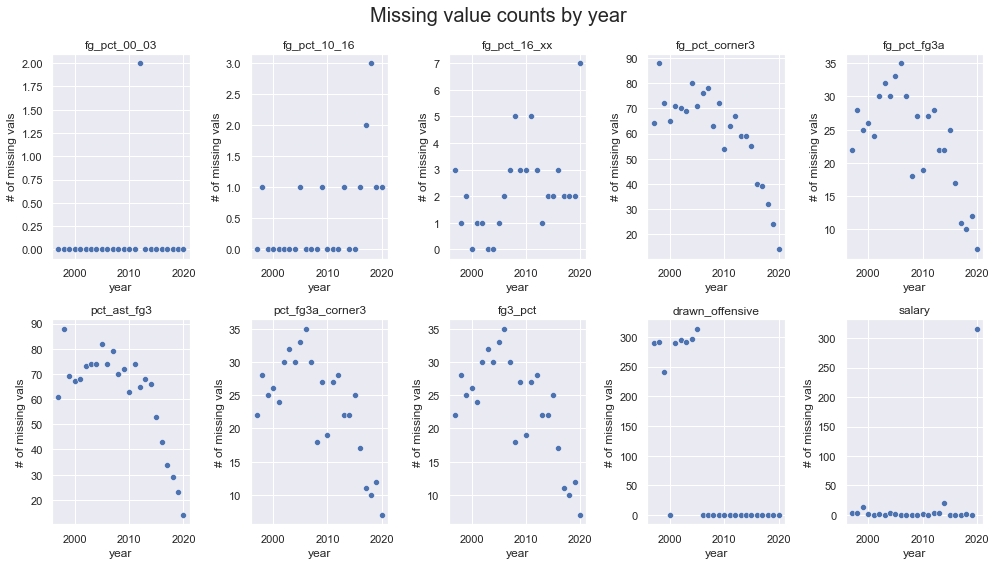

In [275]:
# there are 10 missing cols, is there a time trend?

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))
fig.suptitle('Missing value counts by year', fontsize=20)

for missing_col, ax in zip(missing_cols, axes.reshape(-1)):
    
    s = sns.scatterplot(x='year', y=missing_col, data=df_year_na, ax=ax)
    s.set_title(missing_col)
    s.set_ylabel('# of missing vals')
    plt.tight_layout()

plt.savefig('missing_vals_by_year.png')

### Thoughts: 

- drop `drawn_offensive`
- impute 0s for all the shooting missing %s as they indicate 0 attempts from region
- No salary data for 2020

### Quick check that all the 'shooting % from xyz' all sum to 0

In [276]:
shooting_percent_cols = ['fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16','fg_pct_16_xx', 'fg_pct_fg3a']
shooting_location_cols =  ['pct_fga_00_03',
                             'pct_fga_03_10',
                             'pct_fga_10_16',
                             'pct_fga_16_xx',
                              'pct_fga_fg3a',
                             ]

df_shooting_location = df[shooting_location_cols].copy()

df_shooting_location['tot'] = df_shooting_location[shooting_location_cols].sum(axis=1)
df_shooting_location[(df_shooting_location['tot'] < 0.99) & (df_shooting_location['tot'] > 1.01)]

## Checks out

,pct_fga_00_03,pct_fga_03_10,pct_fga_10_16,pct_fga_16_xx,pct_fga_fg3a,tot
player,,,,,,


### Quick check that missing %s correpond to 0 shots
Yes, impute with 0s

In [277]:
m_col = 'fg_pct_00_03'
l_col = 'pct_fga_00_03'
df[df[m_col].isna()][[m_col, l_col]]

m_col = 'fg_pct_03_10'
l_col = 'pct_fga_03_10'
df[df[m_col].isna()][[m_col, l_col]]

m_col = 'fg_pct_10_16'
l_col = 'pct_fga_10_16'
df[df[m_col].isna()][[m_col, l_col]]

m_col = 'fg_pct_16_xx'
l_col = 'pct_fga_16_xx'
df[df[m_col].isna()][[m_col, l_col]]

m_col = 'fg_pct_fg3a'
l_col = 'pct_fga_fg3a'
df[df[m_col].isna()][[m_col, l_col]]

,fg_pct_00_03,pct_fga_00_03
player,,
James Jones 2012,NaN,0.0
Steve Novak 2012,NaN,0.0


,fg_pct_03_10,pct_fga_03_10
player,,


,fg_pct_10_16,pct_fga_10_16
player,,
Keith Askins 1998,NaN,0.0
Danny Fortson 2005,NaN,0.0
Reggie Evans 2009,NaN,0.0
Greg Smith 2013,NaN,0.0
Clint Capela 2016,NaN,0.0
DeAndre Jordan 2017,NaN,0.0
Joakim Noah 2017,NaN,0.0
Luc Mbah a Moute 2018,NaN,0.0
Salah Mejri 2018,NaN,0.0


,fg_pct_16_xx,pct_fga_16_xx
player,,
Greg Anderson 1997,NaN,0.0
Gheorghe Mureșan 1997,NaN,0.0
Stojko Vranković 1997,NaN,0.0
Ben Wallace 1998,NaN,0.0
Chris Dudley 1999,NaN,0.0
Shaquille O'Neal 1999,NaN,0.0
Jahidi White 2001,NaN,0.0
Jahidi White 2002,NaN,0.0
Danny Fortson 2005,NaN,0.0


,fg_pct_fg3a,pct_fga_fg3a
player,,
Stacey Augmon 1997,NaN,0.0
Mark Bryant 1997,NaN,0.0
Michael Cage 1997,NaN,0.0
Dale Davis 1997,NaN,0.0
Andrew DeClercq 1997,NaN,0.0
...,...,...
Rudy Gobert 2020,NaN,0.0
Richaun Holmes 2020,NaN,0.0
DeAndre Jordan 2020,NaN,0.0


### Fill shooting %s NaNs with 0s

In [278]:
shooting_percent_cols = ['fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_fg3a', 'fg_pct_corner3', 'fg3_pct']
df.loc[:, shooting_percent_cols] = df[shooting_percent_cols].fillna(0.0)

In [279]:
df.isna().sum().sort_values(ascending=False)[0:10]

drawn_offensive     2308
pct_ast_fg3         1483
pct_fg3a_corner3     560
salary               373
fg_pct_00_03           0
bpm                    0
vorp                   0
year                   0
avg_dist               0
fg3_heave              0
dtype: int64

### Fills 0s for other 3pt shooting cols

In [280]:
other_shooting_0s = ['pct_ast_fg3', 'pct_fg3a_corner3']
df[(df['pct_ast_fg3'].isna()) | (df['pct_fg3a_corner3'].isna())][other_shooting_0s + ['fg3_per_poss']][0:15]

,pct_ast_fg3,pct_fg3a_corner3,fg3_per_poss
player,,,
Greg Anderson 1997,NaN,0.000,0.0
Stacey Augmon 1997,NaN,NaN,0.0
Isaac Austin 1997,NaN,0.333,0.0
Shawn Bradley 1997,NaN,0.125,0.0
P.J. Brown 1997,NaN,0.500,0.0
Mark Bryant 1997,NaN,NaN,0.0
Jason Caffey 1997,NaN,0.000,0.0
Michael Cage 1997,NaN,NaN,0.0
Antoine Carr 1997,NaN,0.000,0.0


In [281]:
df.loc[:, other_shooting_0s] = df[other_shooting_0s].fillna(0.0)

## Drop `drawn_offensive`

In [282]:
df = df.drop('drawn_offensive', axis=1)

In [283]:
df.isna().sum().sort_values(ascending=False)[0:10]

salary          373
fg_pct_03_10      0
bpm               0
vorp              0
year              0
avg_dist          0
fg3_heave         0
fg3a_heave        0
fg_dunk           0
fg_pct            0
dtype: int64

### Fill missing 2020 salary NaNs with 'missing'


In [284]:
df.loc[:, 'salary'] = df['salary'].fillna('missing')

In [285]:
df.isna().sum().sort_values(ascending=False)[0:10]

nationality    0
obpm           0
bpm            0
vorp           0
year           0
avg_dist       0
fg3_heave      0
fg3a_heave     0
fg_dunk        0
fg_pct         0
dtype: int64

In [286]:
df.shape

(7363, 91)

In [287]:
# Save cleaned version of data (no missing values)
df.to_csv('bballref_data/clean_1997_2020.csv')